# APMTH 207: Advanced Scientific Computing: 
#### (Stochastic Methods for Data Analysis, Inference and Optimization)

## Tutorial: Political Redistricting with Metropolis-Hastings Markov Chain Monte Carlo
<BR>
<BR>
<BR>

*Weighers and Slayers of
Very Slandered
Gerrymanders:*

**Jeff Winchell, June Hwang, Steven Torrisi**
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/The_Gerry-Mander_Edit.png/860px-The_Gerry-Mander_Edit.png width=300>

### I. Introduction

The purpose of our project is to provide a brief exposition of the procedure employed in "Redistricting and the Will of the People" authored by Mattingly and Vaughn[1] and to reproduce some of the main results obtained in the original paper using programs we developed.

The U.S. House of Representatives consists of 435 voting members elected from the fifty states every two years. The Constitution mandates that the number of seats allocated to each state be propotional to the size of the population (with the minimum of one seat for each state), and thus the number of seats can change following each decennial Census through a process called reapportionment. Redistricting refers to the process where the borders of Congressional Districts within a given state are redrawn, often (but not necessarily) following each reapportionment. In a majority of U.S. states, redistricting falls under the authority of the state legislature, while a minority of states utilize independent commissions for this purpose $[2]$.

Since the districts have to be generated by grouping the existing communities or other smaller geographic areas together, however, it is subject to what is often referred to as the Modifiable Aerial Unit Problem (MAUP): depending on a given scheme of aggregation, many statistics of interest such as correlation and local majority can shift significantly[3][4]. In fact, it is possible to use two different methods of aggregation on the same underlying data to produce correlation from $-1$ all the way to $1$[5]. In terms of redistricting, this problem often manifests itself in the form of Gerrymandering: a partisan-motivated redistricting that results in a substantial disparity between the share of the vote that a party receives and the proportion of seats that party controls.

Mattingly and Vaughn took on the case of suspected Gerrymandering by state Republicans to ensure that they gained a disproportionate share of Congressional seats in the election of 2012. At the time of the election, Democratic candidates gained the majority of two-party votes, yet were only awarded three out of the thirteen districts drawn after the 2010 Census. To investigate how "unusual" the redistricting plan was in terms of the election result it produced, the authors of the original paper generated the probability distribution of redistricting based only on the neutral criteria of (i) equal population sizes and (ii) compactness of the shape of the districts and found that the actual 2010 redistricting was an extreme outlier from such a distribution.

In the following sections, we first introduce the notations and concepts employed by the authors and explain the gist of the procedure used to sample nonpartisan redistricting plans. Then, we create our own set of codes to replicate the procedure and apply it to a toy example on an imaginary state with 25 Voting Tabulation Districts (VTDs) to provide a sense of how it works. Then as a final measure, we collect and aggregate the actual data from North Carolina to see if we obtain a conclusion similar to the authors'.

### II. Procedures


There are two major criteria in evaluating whether a given redistricting plan is desirable, and correspondingly, how likely it is to be sampled in the simulated probability distribution. First is the equal division of population. In an extreme hypothetical case where one district only has one eligible voter and the other district has 100 such voters, then it can be said that the lone voter in the former would enjoy 100 times the average representation afforded to any voter in the latter. To ensure that such a gross violation of the principle of equal representation does not happen (or at least much less likely to appear compared to others), the sampling procedure has to prefer a redistricting plan that divides the state population into equal blocks of 13, ceteris paribus.

The second criterion is the compactness of the shape of the districts. Since the American electoral system is based on the idea of geographic representation (i.e., an elected representative is responsible for safeguarding the interests of the people living in the communities that elected them), a need arises to preserve the boundaries of historical communities in drawing the lines of Congressional Districts. Although the principle itself does not say anything directly about the shape of the districts, we can observe that in many cases communities are formed among groups of people living closely together and that oftentimes Gerrymandering entails an arbitrary elongation of district boundaries into "foreign" territories to include and exclude certain constituents. Hence the compactness criterion punishes a redistricting plan that generates unneccary perturbations in district borders, once again ceteris paribus.

In order to incorporate these two criteria into sampling redistricting plans, the authors introduce the following notations and conventions.

First, the state is represented as a graph $G$, with its vertices $V$ denoting the VTDs in the state and its edges $E$ connecting a pair of vertices if and only if the two VTDs are adjacent. Then, we can consider a redistricting plan $\xi \in \mathcal{R}$ as a function that maps $V$ into the set $\{1, 2, ..., 13 \}$ s.t. each of the VTDs gets assigned to one of the thirteen Congressional Districts. Then a given $\xi$ is evaluated according to the following quantities $J_{pop}(\xi)$ and $J_{compact}(\xi)$, which reflect the two criteria mentioned above.

\begin{eqnarray*}
J_{pop}(\xi) &=& c_{pop} \sum_{i = 1}^{N} (pop(D_i(\xi)) - \frac{N_{pop}}{N})^2 \\
J_{compact}(\xi) &=& c_{compact} \sum_{i = 1}^{N} \frac{(boundary(D_{\cdot i}(\xi)))^2}{area(D_{i}(\xi))} \\
\end{eqnarray*}

where $\frac{N_{pop}}{N}$ is simply the average district-level population, $boundary(D_{\cdot i}(\xi))$ and $area(D_{i}(\xi))$ are the length of the boundary and the area for district $D_i$, and $c_{pop}$ and $c_{compact}$, set to be $\frac{1}{5000}$ and $2000$ respectively by the authors, are positive constants to make the two scores operate at roughly the same scale. We can see that these two quantities measure (squared) deviance from the two desirable criteria: $J_{pop}(\xi)$ is minimized when all districts have equal populations and $J_{compact}(\xi)$ is minimized if the districts approximate circles as closely as possible.

With these two scores defined, for any redistricting plan in which all CDs are connected, the criterion to be minimized is

\begin{eqnarray*}
J_{\lambda}(\xi) &=& \lambda J_{pop}(\xi) + (1 - \lambda) J_{compact}(\xi)
\end{eqnarray*}

where $\lambda \in [0, 1]$ controls the relative weight distributed to each of the two scores. The authors choose $\lambda = .3$ as the default value that produces comparable (yet still lower) values of both scores to those of the actual districts in 2012, although they use several different values of $.1, .2, .3, .4$ along with two different size of the thinning parameter $m \in \{40K, 100K \}$ in presenting the results. We can assign an arbitrarily large number to redistricting plans that do not result in contiguous districts to ensure that these plans are only sampled with probability $0$ later.

Then, the probability that $\xi$ will be sampled is given by the following, with inverse temperature $\beta > 0$:

\begin{eqnarray*}
\mathcal{P}_{\lambda, \beta}(\xi) &=& \frac{\text{exp}[- \beta J_{\lambda}(\xi)]}{\sum_{\xi^{\prime} \in \mathcal{R}} \text{exp}[- \beta J_{\lambda}(\xi^{\prime})]}
\end{eqnarray*}

where we can see $\mathcal{P}_{\lambda, \beta}(\xi)$ is inversely correlated with $J_{\lambda}(\xi)$ s.t. we are more likely to sample redistricting plans with smaller values of the combined criterion. In addition, $\beta$ controls how strongly $J_{\lambda}(\xi)$ controls the probability: as $\beta \rightarrow 0$, we approximate a uniform sampling over $J_{\lambda}(\xi)$ while as $\beta \rightarrow \infty$ the probability distribution becomes more sharply unimodal. The authors set $\beta = .01$ after verifying it to be a reasonable value of the parameter that produces good candidate redistricting plans.

Since the sheer number of possible combinations make it difficult to perform simple random sampling, the authors of the original paper then uses Metropolis-Hastings algorithm to implement the sampling. The initial state is set to be the actual districts in 2012, and each step with $\xi$ proposes a new plan $\xi^{\prime}$ according to the following procedure (we simplify the terminology used in the original paper:

(i) randomly choose an edge at the borders of any two Congressional Districts and let the two VTDs associated with the edge as $u, v$;
(ii) With $\frac{1}{2}$ probability, either switch $u$ into $v$'s district or switch $v$ into $u$'s district.

Then, $q(\xi, \xi^{\prime}) = \frac{1}{2} con(\xi)$ is used for the M-H algorithm where $con(\xi)$ is the total number of candidate edges at step (i) for a given $\xi$ and the acceptance probability is $\min \{1, \frac{con(\xi)}{con(\xi')} \text{exp}[- \beta (J_{\lambda} (\xi^{\prime}) - J_{\lambda} (\xi))]\}$. However, for simplicty's sake, we will drop the factors of con in our implementation and thus set $\frac{con(\xi)}{con(\xi')} =1$..

To make sure that the proposals appropriately reflect the entire sample space, Mattingly and Vaughn use heating ($\beta = .001$) and cooling ($\beta = .01$) period where the heating period facilitates a thorough seach across the sample space and a sample is drawn at the end of the following cooling period which stabilizes the distribution. This alteration takes place by dividing the thinning parameter $m$ by two: the first to $\frac{m}{2}$-th steps comprise the heating period, and $\frac{m}{2} + 1$-th to $m$-th steps denote the cooling period.

After the procedures have been implemented and the results were obtained, Mattingly and Vaughn find that when using $\lambda \in \{.1, .2, .3, .4 \}$ and $m \in \{40K, 100K \}$, the median number of seats awarded to the Democratic candidates in the sampled redistricting plans were always between 6 and 8. In addition, across all such parameter specifications, at least 90\% of the sampled plans elected $5$ to $9$ Democratic candidates, thus illustrating the extreme unlikelihood of the actual result in 2012 (and 2016) where Democrats only gained $3$.

# Toy Model Implementation
We will demonstrate the spread of possible gerrymandering configurations which can be enacted on a small, finite two-dimensional grid, in which points at Cartesian coordinates represent nodes (Voter Tabulation Districts) which border their nearest neighbors (up, down, left, and right) and with one person each, who is either a Democrat or a Republican. We will first describe the layout of our code by describing the two main classes: "VTD", and "State", and then implement the model on a 3x3 and 5x5 grid.

## Code Definitions
In the below cell, we define a VTD (voter tabulation district) class, a simple object which contains key information about a zone which is the smallest indivisible unit of a re-districting scheme.

The relevant attributes for a VTD are:

- ID (integer), which uniquely labels a VTD
- District (integer): Denotes membership to a given congressional district.
- Population (integer): For our purposes, this will always be 1.
- Area (float): Used as part of compactness population.
- Fraction of the population that is democratic, an easy way to store partisan split (float).
- Neighbors(dict) indexed as a dictionary with keys (int) as VTD ID, and values (float) as length of mutually shared border.
- Intrinsic Perimeter (float): Denotes perimeter, which is counted as a part of the perimeter independent of neighbors.

In [1]:
from typing import List, Dict, Tuple
import numpy as np
from math import exp
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
from copy import deepcopy

class VTD(object):
    """
    Voter tabulation district. Contains attributes about
    the population.
    args
    ID: An integer which identifies the VTD.
    District: Integer which denotes membership in a district.
    Area: Float for land area.
    Pop: Population.
    ...
    neighbors, dict: key is VTD id, value is shared boundary.
    """
    def __init__(self, ID : int = None,
                 district: int=-1,
                 perimeter : float =1,
                 area: float = 1,
                 pop: int = 1,
                 county: str = '',
                 frac_dem: float = 1,
                 minority_pop: int = 0,
                 is_terminus: bool = False,
                 neighbors : Dict[int,float] ={},
                 intrinsic_perimeter: float = 0):
        
        if ID is None:
            self.ID = np.random.randint()
        else:
            self.ID = ID
        
        self.district=district
        self.perimeter = perimeter
        self.area = area
        self.pop = pop
        
        self.county = county
        
        d_votes = int(np.rint(frac_dem*pop))
        self.party_votes= {'D':d_votes,'R':pop-d_votes}
        self.is_terminus = is_terminus
        
        self.neighbors = neighbors
        self.intrinsic_perimeter =0
        
    
    
    def net_D_votes(self):
        """
        Returns the net number of democratic votes.
        """
        return self.party_votes['D']-self.party_votes['R']
    
    
    def __repr__(self):
        return 'VTD ID:'+str(self.ID)
    
    def __str__(self):
        rep_str = "Pop: {}, District: {}, Party Votes: {}".format(
            self.pop,self.district,self.party_votes)
        return rep_str

In the below cell, we define a State object, which is designed to contain the VTDs, manage their membership within districts, and have methods which perform calculations on the districts. Examples include  computing the total population per district, score the current districting scheme along lines of compactness and population split, imposing a new districting, or holding an election (which returns the winning party in each district).

Without documenting the methods exhaustively, the most important ones are:

- A method to re-district the VTDs given a list of integers indexing district affiliation,
- A method which determines if all of the districts are connected, by generating an adjacency matrix associated with each district and determining if the graph it describes is connected,
- A method which computes the current 'district' score, which combines population and compactness across all districts,
- A method which 'holds an election' by tallying the population $\times$ democratic vote fraction for each district, returning the results either by district or by party

In the MCMC tools section, we implement a version of the algorithm as specified in the paper which our project is based on [1].

The way our implementation works is as follows:

1. Compute the population score for the district, which is 0 when all of the districts are equal in population.
2. Compute the compactness score for the district, which is minimized when all of the districts are compact.
3. Compute a combined score $J$, which is a weighted sum of the two. We use $\lambda=1$ and also weight each score equally, for simplicity's sake. 
4. Determine the 'conflicted edges' in the state, which will be a list of pairs of VTDs which are both i. neighbors and ii. in different districts.
5. Flip conflicted edges with a 50-50 probability (e.g. two VTDs in neighboring districts A and B become re-assigned as either AA or BB). For our small system sizes, we constrain it to a small number of flips (1 or 2) in each step, chosen at random from the conflicted edges. 
6. From this new districting, compute a combined score as in steps 1-3.
7. If the number of districts has changed (meaning a district has been accidentally erased), or any of the districts are now disconnected, reject the new scheme.
8. If the score improved, keep the new districting scheme.
9. If the score worsened, accept the new state with a probability given by $e^{-\beta (J_old-J_new)}$.

Note: In step 9, the paper included a prefactor involving the ratio of the number of conflicted edges, which seems to be a very crude metric for compactness. In the toy model we did not include this in our implementation for simplicity's sake. In the model using actual North Carolina data, we do have the actual shared border lengths so we can measure perimeter/area directly.


In [2]:
class State(object):
    """
    Graph which contains VTDs and district dictionaries, indexed by number.
    """
    def __init__(self,VTDs: List[VTD] = None,
                 N_districts_fixed: int = 1,initial_scheme: List[int]= None):
        
        self.VTDs = {vtd.ID:vtd for vtd in VTDs}
        self.IDs = self.VTDs.keys()
        
        self.N_districts = N_districts_fixed
        
        # Instantiate districts attribute and populate it using refresh_districts
        if initial_scheme is None:
            self.districts = {}
            self.refresh_districts()
        else:
            self.redistrict_by_list(initial_scheme)
            
        assert len(self.districts.keys()) == self.N_districts, "Number of initial districts not equal to constrainted districts"
    
    ##################################
    # DISTRICT / ELECTION MANAGEMENT #
    ##################################
    def refresh_districts(self):
        """
        Loop through State's list of VTDs, taking the district
        from each, and storing a dictionary of type
        {int: List[VTD]} as self.districts
        """
        
        vtd_list = self.VTDs.values()        
        all_districts = list(set([vtd.district for vtd in vtd_list]))
        self.districts = {district_id: [] for district_id in all_districts}
        
        for vtd in vtd_list:
            self.districts[vtd.district].append(vtd)
            
    def get_districting_scheme(self)->List[int]:
        """
        Returns the current districting scheme as a list of integers.
        Useful for concise storage of a schemes.
        """
        return [int(vtd.district) for vtd in self.VTDs.values()]
    
    
    def hold_deterministic_election(self,return_as_count = False):
        """
        Loop through districts and count the votes for each one,
        printing the result.
        """
        
        results = {}
        # Tally results
        for district,VTDs in self.districts.items():
            curr_count = 0
            for vtd in VTDs:
                curr_count += vtd.net_D_votes()
            
            if curr_count>0: results[district]='D'
            elif curr_count<0: results[district]='R'
            elif curr_count==0: results[district]='Tie'
        
        # Return by party instead of by district if requested
        if return_as_count:
            d_count = list(results.values()).count('D')
            r_count = list(results.values()).count('R')
            tie_count = list(results.values()).count("Tie")
            
            return {'D':d_count,"R":r_count,'Tie':tie_count}
        return results
    
    def hold_probabalistic_election(self):
        """
        Loop through districts and get votes from a distribution associated with
        each VTD instead of from a pre-determined count.
        
        Hook to allow for more sophisticated elections.
        """
        raise NotImplementedError()
        
    def are_districts_connected(self) -> bool:
        """
        Loop through districts and VTDs and
        ensure that there are no disconnected districts.
        """
        
        for district_id in self.districts.keys():
            adj_mat = self.district_adjacency_matrix(district_id)
            if not self.is_matrix_connected(adj_mat):
                return False
        
        return True
        
    def district_adjacency_matrix(self,district_id : int) -> np.ndarray:
        """
        Given a district ID to target, generate an adjacency matrix
        of that district. Can be used to determine
        if the district is connected or not.
        
        #TODO: Could be made more efficient in only computing the upper-right side
        since the matrix is symmetric.
        """
        # Determine size of district and generate empty adjacency matrix
        district_size = len(self.districts[district_id])
        adjacency = np.eye(district_size)
        
        # Get the IDs of the VTDs in the district
        district_vtds = list(self.districts[district_id])
        district_vtd_ids = [vtd.ID for vtd in district_vtds]
        
        # Order the VTDs in a dictionary in one arbitrary but consistent way, like so:
        # [0: vtd1_ID, 1: vtd2_ID, ... N-1: vtdN_ID]
        # Which will be used as the indexes in the matrix
        ordered_to_vtd = {n: district_vtds[n] for n in range(district_size)}
        vtd_to_ordered = {district_vtds[n].ID : n for n in range(district_size)}

        
        for i, vtd1 in enumerate(district_vtds):
            #Get the neighbor's VTD IDs and filter by those in the district
            neighbor_ids = [nbr_id for nbr_id in vtd1.neighbors.keys()]
            neighbors_in_district = list(set(neighbor_ids) & set(district_vtd_ids))
            
            # The indices in the matrix the neighbors correspond to are obtained
            j_indexes = [vtd_to_ordered[n_id] for n_id in neighbors_in_district]
            # Connectivity is recorded in the matrix
            for j in j_indexes:
                adjacency[i][j]=1
        
        return adjacency
      
    def total_adjacency_matrix(self) -> np.ndarray:
        """
        Generate an adjacency matrix of the entire state.
        
        #TODO: Could be made more efficient in only computing the upper-right side
        since the matrix is symmetric.
        """
        # Determine size of district and generate empty adjacency matrix
        state_size = len(self.VTDs)
        adjacency = np.eye(state_size)
        
        # Get the IDs of the VTDs in the district
        state_vtds = self.VTDs.values()
        state_vtd_ids = self.VTDs.keys()
        
        # Order the VTDs in a dictionary in one arbitrary but consistent way, like so:
        # [0: vtd1_ID, 1: vtd2_ID, ... N-1: vtdN_ID]
        # Which will be used as the indexes in the matrix
        ordered_to_vtd = {n: state_vtds[n] for n in range(state_size)}
        vtd_to_ordered = {state_vtds[n].ID : n for n in range(state_size)}

        for i, vtd1 in enumerate(state_vtds):
            #Get the neighbor's VTD IDs and filter by those in the district
            neighbor_ids = [nbr_id for nbr_id in vtd1.neighbors.keys()]
            
            # The indices in the matrix the neighbors correspond to are obtained
            j_indexes = [vtd_to_ordered[n_id] for n_id in neighbor_ids]
            # Connectivity is recorded in the matrix
            for j in j_indexes:
                adjacency[i][j]=1
        
        return adjacency
    
    def redistrict_by_list(self,district_ids: List[int]):
        """
        Based on a list of district IDs, iterate through the VTDs and
        re-assign the VTDs to each district respectively.
        """
        assert len(district_ids)== len(self.VTDs),  \
                "District list length ({}) is not equal to number of VTDs ({})".format(len(district_ids),len(self.VTDs))
        
        for i, district in enumerate(district_ids):
            self.VTDs[i].district = int(district)
        self.refresh_districts()
        
    def population_by_district(self) -> Dict[int,int]:
        """
        Compute and return a dictionary with keys of district ID
        and values of population of the respective district.
        """
        pop_dict = {}
        for district, vtds in self.districts.items():
            pop_dict[district] = sum([vtd.pop for vtd in vtds])
        return pop_dict
    
    def total_population(self) -> int:
        """
        Compute and return the total population of the state.
        """
        pop_dict = self.population_by_district()
        return sum(pop_dict.values())

    def area_by_district(self) -> Dict[int,float]:
        """
        Compute and return a dictionary with keys of district ID
        and values of population of the respective district.
        """
        area_dict = {}
        for district, vtds in self.districts.items():
            area_dict[district] = sum([vtd.area for vtd in vtds])
        return area_dict
    
    def total_area(self) -> float:
        """
        Compute and return the total area of the state.
        """
        areas = [vtd.area for vtd in self.VTDs]
        return sum(areas)

    def boundary_by_district(self) -> Dict[int,float]:
        """
        Loop through each VTD in each district, and sum the boundaries
        of the VTD shared with neighbors that are in a different state district.
        """
        
        same_district = lambda vtd1, vtd2: vtd1.district == vtd2.district
        
        district_ids = self.districts.keys()
        
        perimeter_dict = {d_id:0 for d_id in district_ids}
        
        
        
        # Loop through districts
        for d in district_ids:
            # Loop through the VTDs belonging to our current district
            for curr_VTD in self.districts[d]:
                perimeter_dict[d]+=curr_VTD.intrinsic_perimeter
                # Loop through the neighboring VTDs belonging to our current VTD
                for n_id, perimeter in curr_VTD.neighbors.items():
                    # Add to the perimeter of the district if the two VTDs are not in the same district
                    if not same_district(curr_VTD,self.VTDs[n_id]):
                        perimeter_dict[d]+= perimeter
                                         
        return perimeter_dict
       
    @staticmethod
    def is_matrix_connected(matrix: np.ndarray):
        """
        Determines if a square matrix is connected. Not fast but it will work for now.
        """
        size = matrix.shape[0]
        powered_matrix = np.linalg.matrix_power(matrix,size)

        # Check to see if any row has all nonzero elements, which 
        # indicates the graph is connected

        for i in range(size):
            if np.count_nonzero(powered_matrix[i])==size:
                return True
        return False
    
    ################
    #  MCMC TOOLS  #
    ################
                         
    def population_score(self,c_pop: float = 1) -> float:
        """
        Based on equation at the top of page 7 from the paper.
        Score is a norm of the vector of deviations from the population of the state
        divided by the number of districts.
        """
        total_pop = self.total_population()
        district_ids = self.districts.keys()
        n_districts = len(district_ids)
        
        district_populations = self.population_by_district()
        
        avg_pop = total_pop/n_districts
        
        pop_vec = [(district_populations[d]-avg_pop)**2 for d in district_ids]
        
        return c_pop * sum(pop_vec)
    
    def compactness_score(self, c_compact : float =1) -> float:
        """
        Based on second equation on page 7 from the paper.
        Score is a fraction of the boundary of each district squared
        divided by the area of the district.
        """
        
        # Get relevant parameters
        district_ids = self.districts.keys()
        district_areas = self.area_by_district()
        district_boundaries = self.boundary_by_district()
        
        ratios = [district_boundaries[d]**2/district_areas[d] for d in district_ids]
        
        return c_compact * sum(ratios)
    
    def balance_score(self,lambd: float = .5, c_pop: float = 1.,c_compact: float =1.) -> float:
        """
        Computes J_lambda as defined on page 7 of the paper.
        """
        
        # Score is infinity if the districts are not connected
        if not self.are_districts_connected():
            return np.inf
        
        # Score is infinity if we change the number of districts
        if len(self.districts.keys())!=self.N_districts:
            return np.inf

        pop_score = self.population_score(c_pop)
        compact_score = self.compactness_score(c_pop)
        
        return lambd * pop_score + (1 - lambd) * compact_score
    
    def get_borderline_vtds(self):
        """
        Loop through the VTDs and get a list of which VTDs neighbor
        a VTD in another district. This gives you a sense of the number of
        conflicted edges. Then, create a list of 2-tuples from this set
        which enumerates all of the conflicted edges.
        """
        # The districts which are adjacent to a given VTD are enumerated and 
        # stored in a dictionary. A vtd is not considered adjacent to it's own district.
        adjacent_districts = {ID : [] for ID in self.VTDs.keys()}
        current_districting = {vtd.ID : vtd.district for vtd in self.VTDs.values()}
        
        # Loop through all VTDs in the state
        for vtd in self.VTDs.values():
            curr_district = vtd.district
            for nbr in vtd.neighbors.keys():
                if current_districting[nbr]!=curr_district:
                    adjacent_districts[vtd.ID].append(nbr)
                
        conflict_pairs=[]
        # Append all conflict pairs as  tuple (i,j) with the lower ID being first
        for i in current_districting.keys():
            for j in adjacent_districts[i]:
                conflict_pairs.append((min(i,j),max(i,j)))
        
        # Remove the double-counting all at once
        conflict_pairs = list(set(conflict_pairs))
        
        return conflict_pairs
    

    def flip_districts(self,conflict_pairs: List[Tuple[int]],
                      flip_count: int = 0,one_flip_per_VTD_pair: bool = True,) -> List[int]:
        """
        Given a list of conflicting pairs (vtd1.ID,vtd2.ID), with a probability of 1/2, 
        will flip one district to another.
        
        Sets this as the current state districting scheme, and returns the new scheme.
        
        Args:
        conflict_pairs: List of length-2 tuples describing which VTDs to flip districts on
        one_flip_per_VTD_pair: Not implemented. Will limit it so that each VTD only participates in one pair flip
        flip_count: Limits the number of flips which occur per step for testing purposes.
        
        """
        
        #TODO: make it so that each VTD pair only flips once per flip cycle,
        # to slow down flip rate
        if one_flip_per_VTD_pair:
            flipped_VTDs=[]

        
        if flip_count>0:
            indices_to_flip = np.random.choice(list(range(len(conflict_pairs))),
                                               replace=False,size=flip_count)
            conflict_pairs = [conflict_pairs[i] for i in indices_to_flip]
        
        # Precompute random numbers which govern the flips
        flip_prob = np.random.uniform(size=len(conflict_pairs))
        
        for i, pair in enumerate(conflict_pairs):
            if one_flip_per_VTD_pair:
                if pair[0] in flipped_VTDs or pair[1] in flipped_VTDs:
                    continue
                else:
                    flipped_VTDs+=[pair[0],pair[1]]

            if flip_prob[i]<.5:
                self.VTDs[pair[0]].district = int(self.VTDs[pair[1]].district)
            else:
                self.VTDs[pair[1]].district = int(self.VTDs[pair[0]].district)

        self.refresh_districts()
        
        return self.get_districting_scheme()
        
            
    def sample_step(self,lambd: float, c_pop:float, c_compact:float,
                    beta: float, flip_count: int = 0,verbose=True):
        """
        Sample a new step, accepting or rejecting based on the score.
        """
        if verbose:print("Trying new districting scheme...")
        curr_score = self.balance_score(lambd=lambd,c_pop=c_pop,c_compact=c_compact)
        curr_scheme = self.get_districting_scheme()
        curr_conflict_pairs = self.get_borderline_vtds()
        #if verbose:print(curr_conflict_pairs)
        curr_conf = len(curr_conflict_pairs)
        
        new_scheme = self.flip_districts(conflict_pairs=curr_conflict_pairs,
                                         flip_count=flip_count)
        new_score = self.balance_score(lambd=lambd,c_pop=c_pop,c_compact=c_compact)
        new_conflict_pairs = self.get_borderline_vtds()
        new_conf = len(new_conflict_pairs)
        accept_bar = np.random.uniform()
        accept_prob = min(1, exp(-beta*(new_score - curr_score)))
        if verbose: print("Old score: {}, New Score:{}, Accept Prob: {}".format(curr_score,new_score,accept_prob))

        # If the new scheme is unsatisfactory, go back to the old one
        if accept_prob < accept_bar:
            if verbose: print("Scheme rejected")
            self.redistrict_by_list(curr_scheme)
        else:
            if verbose: print("Scheme accepted")
        # Return the final scheme
        
        return self.get_districting_scheme()
        
    
    def sample_districtings(self,scheme_count : int, lambd: float = .5, c_pop : float =1, 
                            c_compact:float = 1, flip_count : int =0, beta = .1,verbose=True):
        """
        Runs a MC sampling process to sample the space of possible districting schemes.
        """
        assert self.balance_score(lambd=lambd,c_pop=c_pop,c_compact=c_compact)!=np.inf , "Initial districting is impossible."

        scheme_list = [[]]*scheme_count
        
        scheme_list[0] = self.get_districting_scheme()
        
        for i in tqdm_notebook(range(scheme_count)):
            
            scheme_list[i] = self.sample_step(lambd=lambd,
                                              c_pop=c_pop, c_compact=c_compact,
                                              beta=beta,verbose=verbose,flip_count=flip_count)
            ##if verbose: print('scheme:',scheme_list[i])
        
        return scheme_list
        
    #######################
    # VISUALIZATION TOOLS # 
    #######################
    
    def visualize_graph(self):
        """
        Generate a graph plot using an external library like NetworkX or Graphvis.
        """         
        raise NotImplementedError()
        
    def print_square_districts(self):
        """
        Special case visualization function that assumes that the districts are
        in a square format.
        """
        size = len(self.VTDs.keys())
        assert np.sqrt(size)==int(np.sqrt(size)), 'District is not square'
        side_length = int(np.sqrt(size))
        
        all_counter=0
        
        vtd_list = list(self.VTDs.values())
        
        while all_counter<size:
            col_counter=0
            string =''
            while col_counter<np.sqrt(size):
                string += str(vtd_list[all_counter].district)
                all_counter+=1
                col_counter+=1

            print(string)
        


def filter_unique_lists(scheme_set: List[List[int]])->List[List[int]]:
    """
    Given a list of districting schemes, removes duplicates and returns the list
    """
        
    unique_districtings = []
    for scheme in scheme_set:#tqdm(scheme_set):
        if scheme in unique_districtings:
            continue
        else:
            unique_districtings.append(scheme)
    return unique_districtings


def filter_even_count(scheme_set):
    """
    Given a list of districting schemes, removes those which do not feature an even split of districts
    """
    district_count = len(set(scheme_set[0]))
    district_set = list(set(scheme_set[0]))
    even_districtings = []
    
    for scheme in scheme_set:#tqdm(scheme_set):
        include = False
        for d in district_set:
            
            if scheme.count(d)!=district_count:
                include=False
                break
            
            include=True
        
        if include:
            even_districtings.append(scheme)
    return even_districtings





In order to save time, we skip burn-in and also filter, at the end of the run, districts which do not have equal population (a reasonable demand for 'states' made up of 9 or 25 VTDs total, each with one person) and also remove duplicate ones. We thus seek to probabalistically generate a set of unique districting schemes, owing to the fact our model has not been highly tuned for effective stepping through the parameter space.

If time allowed, we would have tuned the weighting of the population and compactness scores via $c_{pop}$ and $c_{compact}$, and the parameter $\lambda$, as well as the number of flips which we perform in the flip step (step 5).

# First Toy Implementation: 3x3 grid

We'll demonstrate how the code works by using a simple 3x3 grid with one person per node and three congressional districts, with the top/left being Democratic and the bottom/right be Republican. The grid therefore has 5/9 Democratic VTDs, so a fair districting would involve a majority of Democratic representatives (ideally 2, so there was still Republican representation).

Therefore, we can understand the affiliation of the 'grid' to look like so: 

D D D

D D R

R R R

Which demonstrably has 5 D VTDs of 1 voter each, and 4 R VTDs of 1 voter each. 

We point out that there are two ways to district this which would yield a fair/unfair representation.

One way to district (with labeling District/Affiliation):

---

1D 2D 3D

1D 2D 3R

1R 2R 3R

---

In which an election would yield 2 Democratic representatives, and 1 Republican representative..


Another way to district would be:

---


1D 1D 3D

1D 2D 3R

2R 2R 3R

---


In which an election would yield 1 Democratic representatives, and 2 Republican representatives. This is clearly less fair in that it is less reflective of the population's wwill, as  as it reflects the minority of the population (4/9) getting 2/3 of the representation.

Let's implement this model computationally and get a sense of the different districtings that are possible.

## Generation of a simple 3x3 model

In [3]:
grid_neighbors ={0:[1,3], 1:[0,4,2],2:[1,5],3:[0,4,6],4:[1,3,5,7],
            5:[2,4,8],6:[3,7],7:[4,6,8],8:[5,7]}
pops = {n: 1 for n in range(10)}
dem_frac ={n:1 if n <5 else 0 for n in range(10)}
intrinsic_perimeters = {0:2, 1:1, 2: 2, 3: 1, 4: 0, 5:1, 6:2, 7: 1, 8:2}

vtd_list =[]
# Assembling by for loop so we don't have one massive list comprehension :)
for n in range(9):
    neighbors = {i:1 for i in grid_neighbors[n]}
    new_vtd = VTD(ID=n,pop=pops[n],area=1,district=-1,frac_dem=dem_frac[n],neighbors=neighbors,
                 intrinsic_perimeter=intrinsic_perimeters[n]
                 )
    vtd_list.append(new_vtd)
my_state = State(VTDs=vtd_list,N_districts_fixed=3,initial_scheme=[1,2,3,1,2,3,1,2,3])

print("Districting Scheme 1:")
my_state.redistrict_by_list([1,2,3,1,2,3,1,2,3])
print(my_state.hold_deterministic_election())

print("Districting Scheme 2:")
my_state.redistrict_by_list([1,1,3,1,2,3,2,2,3])
print(my_state.hold_deterministic_election())


Districting Scheme 1:
{1: 'D', 2: 'D', 3: 'R'}
Districting Scheme 2:
{1: 'D', 2: 'R', 3: 'R'}


Now, let's run the sampler and filter afterwards out those which have an uneven population. We'll print a few of the districting schemes afterwards to get a sense for the space of new districts, and then hold elections on the generating schemes.

As mentioned above, we filter afterwards for those with an even population split and for unique districting schemes, since we are running with a simplified and uncalibrated version of the sampler.

In [4]:
samples = my_state.sample_districtings(scheme_count=100000,lambd=1,beta=.1,
                                       flip_count=1,verbose=False)

filtered_samples = filter_unique_lists(samples)
filtered_samples = filter_even_count(filtered_samples)

print("Unique districtings found with even population splits:",len(filtered_samples))


Unique districtings found with even population splits: 60


Sampling of at most 5 district schemes:
---
221
231
331
---
213
213
213
---
333
222
111
---
331
311
222
---
113
133
222


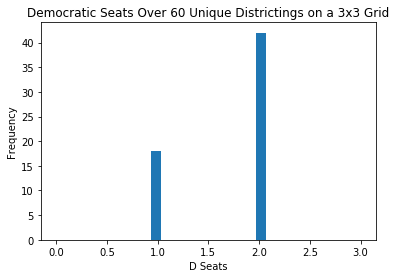

In [5]:
election_results=[]
for scheme in filtered_samples:
    my_state.redistrict_by_list(scheme)
    election_results.append(my_state.hold_deterministic_election(return_as_count=True))

preview_size=5
print("Sampling of at most {} district schemes:".format(preview_size))

indexes = np.random.choice(range(len(filtered_samples)),size=min(preview_size,len(filtered_samples)))

for scheme_index in indexes:
    my_state.redistrict_by_list(filtered_samples[scheme_index])
    print('---')
    my_state.print_square_districts()

D_counts = [result['D'] for result in election_results]

plt.figure()
bins = np.linspace(0,3,30)
plt.hist(D_counts,bins=bins)
plt.title("Democratic Seats Over {} Unique Districtings on a 3x3 Grid".format(len(filtered_samples)))
plt.xlabel("D Seats")
plt.ylabel("Frequency")
plt.show()

## Generation of a simple 5x5 model

Now we'll do the same for a 5x5 grid, which is slightly more interesting, where the initial layout of votes looks like the following (which is now 60 percent Republican and 40 percent Democratic):

R R R D D 

R R R D D

R R R D D 

R R R D D 

R R R D D

It takes a while to sample the parameter space, especially since we'll post-select for the districts which contain even numbers of population. We'll run a few successive sampling runs in which we start with a set of 'seed' districting schemes which have a fair population split, then sample 'around' them. We start with two, then repeat the process twice (varying the temperature and sample count each time).

In [6]:
d_frac_5x5 = {n:1 if n%5>2 else 0 for n in range(25) }
length=5

# Generate list of i,j points
indexed_grid = {}
for i in range(length*length):
    curr_point = (i%length,int(np.floor(i/length)))
    indexed_grid[i]=np.array(curr_point)

# Populate neighbors
neighbors={n:{} for n in range(length*length)}
for i in range(length*length):
    for j in range(length*length):
        if i==j:
            continue
        
        if sum(np.abs(indexed_grid[i]-indexed_grid[j]))==1:
            neighbors[i][j]=1

# Compute the 'intrinsic perimeters', 2 for corner points and 1 for boundary points, 0 for interior
intrinsic_perimeters =[0]*length**2
for n in range(length):
    if (indexed_grid[n][0]==0 or indexed_grid[n][0]==length-1):
        intrinsic_perimeters[n]+=1 
    if (indexed_grid[n][1]==0 or indexed_grid[n][1]==length-1):
        intrinsic_perimeters[n]+=1 

# Generate districts
districts ={n:1+n%5 for n in range(25)}

quint_VTDs =[]
# Assembling by for loop so we don't have one massive list comprehension :)
for n in range(25):
    new_vtd = VTD(ID=n,pop=1,area=1,district=districts[n],frac_dem=d_frac_5x5[n],neighbors=neighbors[n],
                 intrinsic_perimeter=intrinsic_perimeters[n])
    quint_VTDs.append(new_vtd)

quintopia = State(quint_VTDs,N_districts_fixed=5)

initial_schemes=[quintopia.get_districting_scheme()]
initial_schemes.append([int(1+np.floor(n/length)) for n in range(length*length)])


### 1. High temperature in which two trial districtings are used as a seed set

In [7]:
## Three-level sampling:
samples=[]

for scheme in initial_schemes:
    quintopia.redistrict_by_list(scheme)
    samples += quintopia.sample_districtings(scheme_count=10000,lambd=.5,beta=.1,verbose=False,flip_count=1)
    
samples2 = filter_unique_lists(samples)
samples2 = filter_even_count(samples2)

print("Current set of even population districts:",len(samples2))



Current set of even population districts: 8


In [8]:
print("A Random result from the first round of sampling")
rand_index = np.random.randint(0,len(samples2))
quintopia.redistrict_by_list(samples2[rand_index])
quintopia.print_square_districts()

A Random result from the first round of sampling
11444
11244
15222
55233
55333


### 2. Run in which the results from the first trial are used as seeds for a slightly lower  temperature run

In [9]:
samples3 = deepcopy(samples2)
for scheme in samples2:
    quintopia.redistrict_by_list(scheme)
    samples3+= quintopia.sample_districtings(scheme_count=5000,lambd=.5,beta=.1,verbose=False,flip_count=1)
    
    samples3 = filter_unique_lists(samples3)
    samples3 = filter_even_count(samples3)
print('Current list of even-count samples:',len(samples3))



Current list of even-count samples: 20



### 3. Lower temperature in which the results from the second trial are used as the seeds for many very low T runs.


In [1]:

#3. Low temperature in which the results from the second trial are used as the seeds for many very low T runs.
#tqdm = lambda *i, **kwargs: i[0]

final_samples=[]
for scheme in samples3:
    quintopia.redistrict_by_list(list(scheme))
    final_samples+= quintopia.sample_districtings(scheme_count=1000,lambd=1,beta=1,verbose=False,flip_count=1)

filtered_final = filter_unique_lists(final_samples)
filtered_final = filter_even_count(filtered_final)

print("Unique districtings with even population count:",len(filtered_final))

NameError: name 'samples3' is not defined

Sampling of at most 5 district schemes:
---
44221
45231
45231
45231
55331
---
43311
42331
42311
42255
42555
---
43311
42331
42311
42255
42555
---
42333
42313
42111
42251
45555
---
22244
12244
15543
15533
11533


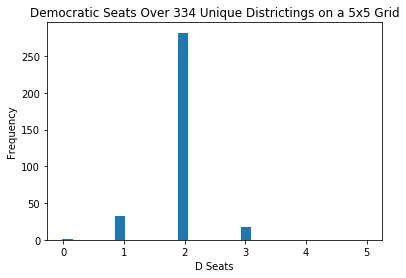

In [11]:
election_results=[]
for scheme in filtered_final:
    quintopia.redistrict_by_list(scheme)
    election_results.append(quintopia.hold_deterministic_election(return_as_count=True))

    
preview_size=5
print("Sampling of at most {} district schemes:".format(preview_size))

indexes = np.random.choice(range(len(filtered_final)),size=min(preview_size,len(filtered_final)))

for scheme_index in indexes:
    quintopia.redistrict_by_list(filtered_final[scheme_index])
    print('---')
    quintopia.print_square_districts()
                
D_counts = [result['D'] for result in election_results]

bins = np.linspace(-.01,5,30)
plt.hist(D_counts,bins=bins)
plt.title("Democratic Seats Over {} Unique Districtings on a 5x5 Grid".format(len(filtered_final)))
plt.xlabel("D Seats")
plt.ylabel("Frequency")
plt.show()



One set of runs produced the following plot, which evidenced that there are some schemes in which 0 democratic seats win; and further, they make up a minority of the districtings sampled:

![Gerrymandered Sample](https://imgur.com/8oWsFGj.jpeg)

Which suggests that there is room for chicanery on the part of a partisan districter; it would also suggest that if such a districting were chosen, it would represent a very small part of the overall district space. Similarly, despite the 60-40 split of R-D votes, one could find districtings which give Democrats majority representation.


---

## Applying the Model to North Carolina Data

### Data Sources

This version uses the voter tabulation district geographic boundaries from the 2012 census bureau files.
https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2012&layergroup=Voting+Districts for North Carolina.

The North Carolina State Assembly Redistricting website provided nearly all the remaining data. The voter tabulation district level population, voting age, democratic vs republican 2014 Senate votes as a proxy for democratic voter percentage:
https://www2.ncleg.net/RnR/Redistricting/BaseData2016

County to congressional district mappings:  
https://www.ncleg.net/GIS/Download/District_Plans/DB_2016/Congress/2016_Contingent_Congressional_Plan_-_Corrected/Reports/DistrictGeography/rptDandC.xlsx

For the counties that had two congressional districts, raw 2018 election result data from TheDataTrust.com was provided to us for academic research purposes.

To process the data from raw data sources into the models two input files (nodes.csv and edges.csv) SQL (SQL Server) programs were used. Those files are attached. A short batch file was used to run that SQL code. This was only tested on the Windows version of SQL Server. The batch file will probably need a little modification to run under Linux. The SQL code and raw data files are in the accompanying zip file.

### Required Libraries

Common python libraries (NumPy, tqdm, Matplotlib) are required to run most of this code. If you don't need a nice progress bar, calls to tqdm/tqdm_notebook can be replaced with the embedded range().

In addition, to generate the maps, PyShp must be installed and in the NC Data, NetworkX is used to detect disconnected congressional districts.

### Code

The toy model code was rewritten for compactness and performance because there are 100 times as many nodes (VTDs) in the graph and an even greater ratio of edges/nodes making runtime a major issue. The algorithm features of the toy model and the model in the paper remain.

In [16]:
from pandas import read_csv
VTD_pandas = read_csv('node.csv')
VTD_pandas.set_index('GeoId',inplace=True)

from networkx.convert_matrix import from_pandas_edgelist
VTD_networkx = from_pandas_edgelist(read_csv('edge.csv'),source='From_GeoId',target='To_GeoId',edge_attr='Miles_of_Common_Border')

from networkx import Graph, set_node_attributes
Congressional_District_Graph={CD:Graph() for CD in set(VTD_pandas.Congressional_District)}
for _, edge in read_csv('edge.csv').iterrows():
    if VTD_pandas.loc[edge['From_GeoId'],'Congressional_District']==VTD_pandas.loc[edge['To_GeoId'],'Congressional_District']:
        Congressional_District_Graph[VTD_pandas.loc[edge['From_GeoId'],'Congressional_District']].add_edge(edge['From_GeoId'],edge['To_GeoId'])
        VTD_pandas.loc[edge['To_GeoId'],'CD_Perimeter_Miles']-=edge['Miles_of_Common_Border']
for key, node in VTD_pandas.iterrows():
    for column in ['Congressional_District','Percent_Dem','Voting_Age_Population','CD_Perimeter_Miles','VTD_Perimeter_Miles','Population','Land_Square_Miles','Dem_Votes','GOP_Votes']:
        VTD_networkx.nodes[key][column]=node[column]

In [17]:
from networkx import is_connected
i=0
for node in VTD_networkx.nodes(data=True):
    print(node)
    i+=1
    if i > 4:
        break

('3700101', {'Congressional_District': 6.0, 'Percent_Dem': 21.5959, 'Voting_Age_Population': 3686.0, 'CD_Perimeter_Miles': -6.899999904774745e-08, 'VTD_Perimeter_Miles': 31.623789311, 'Population': 4869.0, 'Land_Square_Miles': 50.0451087, 'Dem_Votes': 796.025, 'GOP_Votes': 2889.98})
('3700102', {'Congressional_District': 6.0, 'Percent_Dem': 20.077, 'Voting_Age_Population': 3483.0, 'CD_Perimeter_Miles': -1.6299999572311208e-07, 'VTD_Perimeter_Miles': 27.655614225, 'Population': 4491.0, 'Land_Square_Miles': 29.43382095, 'Dem_Votes': 699.2810000000001, 'GOP_Votes': 2783.72})
('3700107', {'Congressional_District': 6.0, 'Percent_Dem': 23.2662, 'Voting_Age_Population': 3307.0, 'CD_Perimeter_Miles': 6.40000035190269e-08, 'VTD_Perimeter_Miles': 22.396940072, 'Population': 4383.0, 'Land_Square_Miles': 21.05706046, 'Dem_Votes': 769.414, 'GOP_Votes': 2537.59})
('3700108N', {'Congressional_District': 6.0, 'Percent_Dem': 37.4773, 'Voting_Age_Population': 3118.0, 'CD_Perimeter_Miles': 2.014887425000

In [ ]:
def Load_NC_Data():
    from pandas import read_csv

    vtd = read_csv('node.csv')
    Congressional_Districts=set(vtd.Congressional_District)
    vtd.set_index('GeoId',inplace=True)
    edges = read_csv('edge.csv')
    from networkx import Graph
    for _, edge in edges.iterrows():
        if vtd.loc[edge['From_GeoId'],'Congressional_District']==vtd.loc(edge['To_GeoId'],'Congressional_District')
            vtd.loc[edge['To_GeoId'],'CD_Perimeter_Miles']-=edge['Miles_of_Common_Border']
    undir=read_csv('undir_edge.csv')
    CD_Graph=dict()
    undir_edges=list()
    for _, edge in temp.iterrows():
        undir_edges.append((edge['From_GeoId'],edge['To_GeoId']))
    vtd_neighbor=dict()
    for i, edge in edges.iterrows():
        # Needed until I get ALL VTD-CD's for multi-CD counties
        if edge['From_GeoId'] in vtd.index and edge['To_GeoId'] in vtd.index:
            if edge['From_GeoId'] in vtd_neighbor:
                t = vtd_neighbor[edge['From_GeoId']]
            else:
                t=list()
            t.append((edge['To_GeoId'],edge['Miles_of_Common_Border']))
            if vtd.loc[edge['From_GeoId'],'Congressional_District']==vtd.loc[edge['To_GeoId'],'Congressional_District']:
                vtd.loc[edge['To_GeoId'],'CD_Perimeter_Miles']-=edge['Miles_of_Common_Border']
            vtd_neighbor[edge['From_GeoId']]=t
    return (vtd, vtd_neighbor, undir_edges)

In [2]:
def Sample_Districtings(vtd, vtd_neighbors, undir_edges, sample_cnt, c_pop = .0002, c_compact = 2000, beta = .001):
    from math import exp
    from tqdm import tqdm, tqdm_notebook 
    from numpy.random import uniform
    from time import time
    Current_Score = Calculate_Score(vtd,c_pop,c_compact)
    samples = list()
    changed_to_cooled_beta=False
    for i in tqdm_notebook(range(sample_cnt)):
        if i >= sample_cnt and not changed_to_cooled_beta:
            changed_to_cooled_beta=True
            beta=beta*10
        vtd_copy = vtd.copy()

        #VTDs on the border that are candidates to change CD
        CD_Border_VTD = set()
        for border_vtd, neighbors in vtd_neighbors.items():
            cd = vtd.loc[border_vtd,'Congressional_District']
            for (neighbor_vtd, _) in neighbors:
                if vtd.loc[neighbor_vtd,'Congressional_District']!=cd:
                    if border_vtd<neighbor_vtd:
                        CD_Border_VTD.add((border_vtd,cd,neighbor_vtd,vtd.loc[neighbor_vtd,'Congressional_District']))
                    else:
                        CD_Border_VTD.add((neighbor_vtd,vtd.loc[border_vtd,'Congressional_District'],border_vtd,cd))
        
        # change CDs of some border VTDs
        Already_Flipped_VTD = set()
        for (vtd1, cd1, vtd2, cd2) in CD_Border_VTD:
            if vtd1 not in Already_Flipped_VTD and uniform()<.5 and flippable(vtd1,cd1,cd2,vtd,undir_edges):
                chgvtd, oldcd, newcd = vtd1, cd1, cd2
            elif vtd2 not in Already_Flipped_VTD and uniform()<.5 and flippable(vtd2,cd2,cd1,vtd,undir_edges):
                chgvtd, oldcd, newcd = vtd2, cd2, cd1
            else:
                continue
            Already_Flipped_VTD.add(chgvtd)

            vtd.loc[chgvtd,'Congressional_District'] = newcd
        
        # recalc perimeters of the CD
        for index, row in vtd.iterrows():
            vtd.loc[index,'CD_Perimeter_Miles']=row['VTD_Perimeter_Miles']
        for from_link, neighbors in vtd_neighbors.items():
            for (neighbor, common_border) in neighbors:
                if vtd.loc[from_link,'Congressional_District']==vtd.loc[neighbor,'Congressional_District']:
                    vtd.loc[neighbor,'CD_Perimeter_Miles']-=common_border

        if not connected_graph(vtd,undir_edges):
            vtd=vtd_copy.copy()
            continue
            
        New_Score = Calculate_Score(vtd, c_pop, c_compact)
        if min(1, exp(-beta*(New_Score - Current_Score))) < uniform():
            vtd = vtd_copy.copy()
        else:
            Current_Score = New_Score

        samples.append(vtd.copy()) 
    return samples

In [3]:
def Calculate_Score(vtd,c_pop=.0001,c_compact=2000):
    Pop_Score = vtd.groupby(['Congressional_District'])[['Population']].sum().reset_index().loc[:,'Population'].var()*(len(set(vtd.Congressional_District))-1)
    Geog_Info = vtd.groupby(['Congressional_District'])[['Land_Square_Miles','CD_Perimeter_Miles']].sum().reset_index()
    Geog_Score = sum(Geog_Info.CD_Perimeter_Miles**2/Geog_Info.Land_Square_Miles)
    return c_pop*Pop_Score+c_compact*Geog_Score

def Election_Results(vtd):
    results = vtd.groupby(['Congressional_District'])[['Dem_Votes','GOP_Votes']].sum().reset_index()
    return sum([1 if row['Dem_Votes']>row['GOP_Votes'] else 0 for _, row in results.iterrows()])

def flippable(chgvtd, oldcd, newcd, vtd, undir_edge):
    return True
    vtd.loc[chgvtd]=newcd
    from networkx import is_connected, Graph
    oldcdG=Graph()
    newcdG=Graph()
    for edge in undir_edge:
        if vtd.loc[edge[0],'Congressional_District']==oldcd and vtd.loc[edge[1],'Congressional_District']==oldcd:
            oldcdG.add_edge(*edge)
        if vtd.loc[edge[0],'Congressional_District']==newcd and vtd.loc[edge[1],'Congressional_District']==newcd:
            newcdG.add_edge(*edge)
    result = is_connected(oldcdG) and is_connected(newcdG)
    vtd.loc[chgvtd]=oldcd
    return result

def connected_graph(node,undir_edge):
    from networkx import is_connected, Graph
    CD1=Graph()
    CD2=Graph()
    CD3=Graph()
    CD4=Graph()
    CD5=Graph()
    CD6=Graph()
    CD7=Graph()
    CD8=Graph()
    CD9=Graph()
    CD10=Graph()
    CD11=Graph()
    CD12=Graph()
    CD13=Graph()
    for edge in undir_edge:
        CD=node.loc[edge[0],'Congressional_District']
        if CD==node.loc[edge[1],'Congressional_District']:
            if CD==1:
                CD1.add_edge(*edge)
            elif CD==2:
                CD2.add_edge(*edge)
            elif CD==3:
                CD3.add_edge(*edge)
            elif CD==4:
                CD4.add_edge(*edge)
            elif CD==5:
                CD5.add_edge(*edge)
            elif CD==6:
                CD6.add_edge(*edge)
            elif CD==7:
                CD7.add_edge(*edge)
            elif CD==8:
                CD8.add_edge(*edge)
            elif CD==9:
                CD9.add_edge(*edge)
            elif CD==10:
                CD10.add_edge(*edge)
            elif CD==11:
                CD11.add_edge(*edge)
            elif CD==12:
                CD12.add_edge(*edge)
            elif CD==13:
                CD13.add_edge(*edge)
    return (is_connected(CD1) and 
            is_connected(CD2) and 
            is_connected(CD3) and
            is_connected(CD4) and 
            is_connected(CD5) and 
            is_connected(CD6) and 
            is_connected(CD7) and 
            is_connected(CD8) and 
            is_connected(CD9) and 
            is_connected(CD10) and 
            is_connected(CD11) and
            is_connected(CD12) and 
            is_connected(CD13))

def plot_map(data,shapefile,iteration, CDs):
    %matplotlib inline
    from matplotlib.pyplot import show, figure, fill, axis, text
    color_map = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    figure(figsize=(17,.05))
    axis('off')
    if iteration==0:
        title='North Carolina 2016 Congressional Districts'
    else:
        title='North Carolina Iteration '+str(iteration)+' of Hypothetical Redistricting'
    text(0.45,0,title,ha='center',va='center', fontsize=24)
    show()
    
    figure(figsize=(17,.05))
    axis('off')
    text(.45,1,'Democrat Seats Won (out of 13): %s'%CDs,ha='center',va='center', fontsize=20)
    show()
    figure(figsize=(40,12))
    for shape in shapefile.shapeRecords():
        GeoId = shape.record[3]
        if GeoId not in data.index.values:
            color=color_map[0]
        else:
            CD=data.loc[GeoId,'Congressional_District']
            color = color_map[1+CD%9]
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        fill(x,y,color=color)
    show()

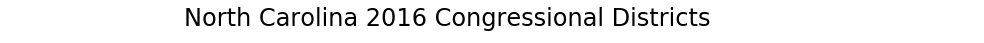

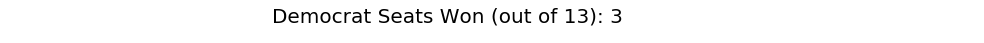

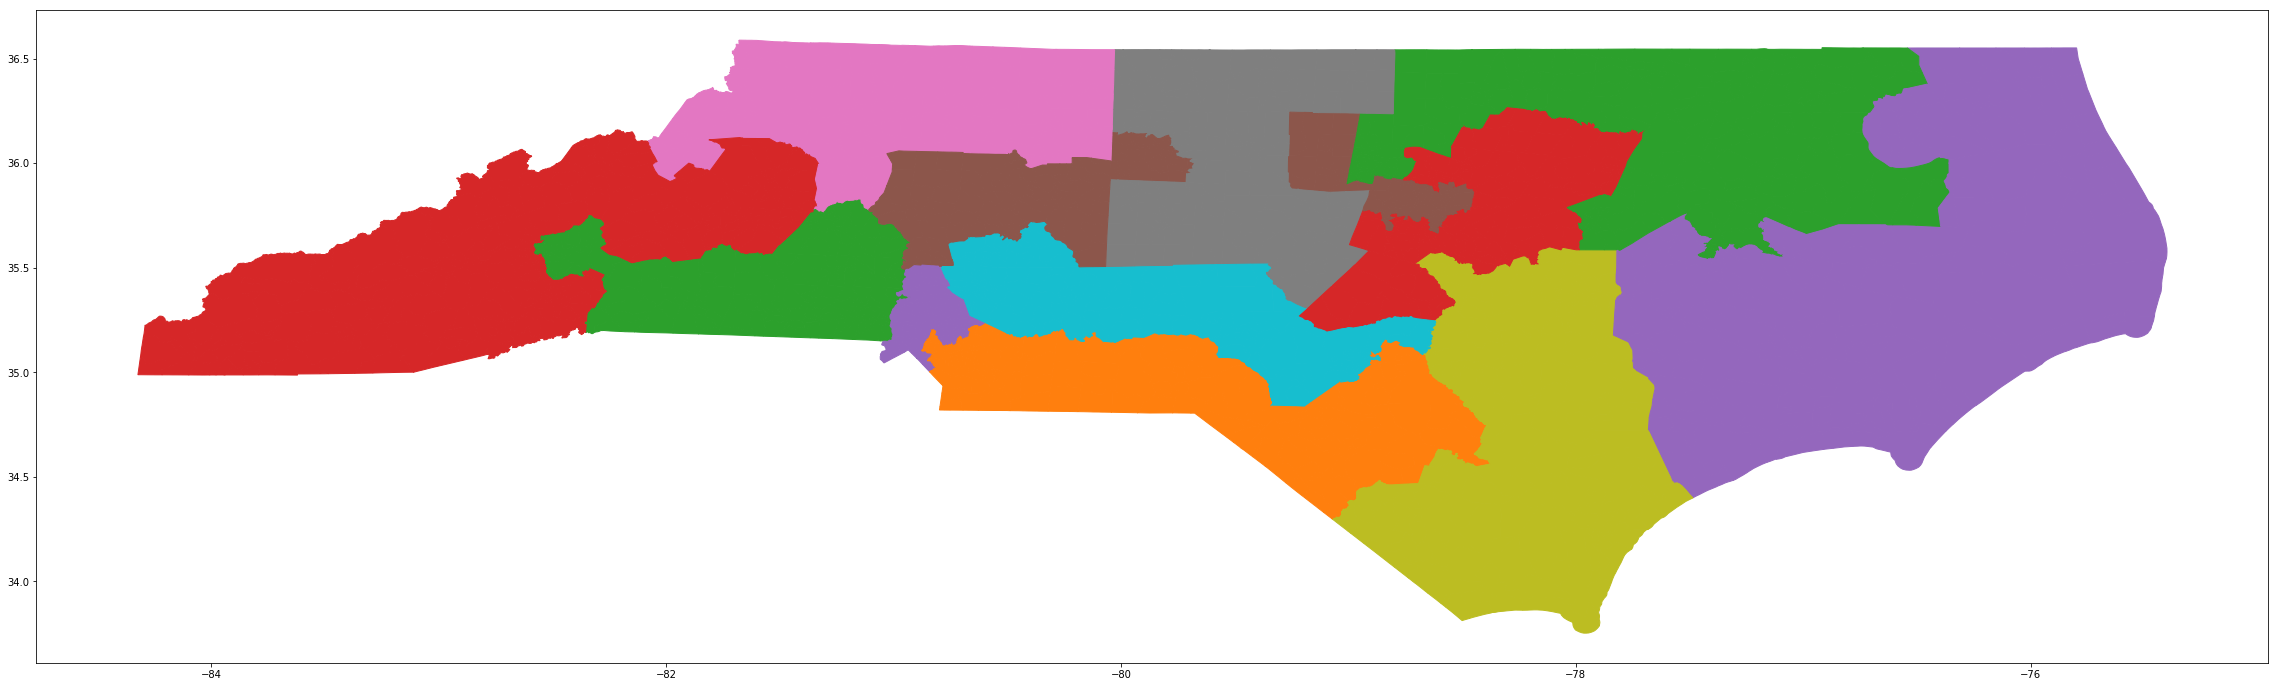

In [4]:
NC, Edges, Undir_Edges = Load_NC_Data()
from shapefile import Reader
VTD_Map = Reader('tl_2012_37_vtd10.shp')
plot_map(NC, VTD_Map, 0, Election_Results(NC))

In [5]:
samples=Sample_Districtings(NC, Edges, Undir_Edges, 2)
burnin=20
iteration=0
for sample in samples:
    iteration+=1
    if iteration<=burnin:
        continue
#    target_cd_count = 4
#    current_cd_count = Election_Results(sample)
#    if target_cd_count==current_cd_count:
    plot_map(sample, VTD_Map, iteration, current_cd_count)
#        target_cd_count+=1
#        if target_cd_count>13:
#            break

In [6]:
len(samples)

0

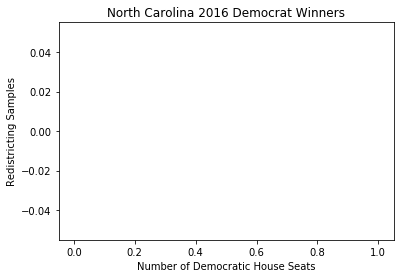

In [17]:
Dem_Seats=list()
from numpy import mean
for sample in samples:
    Dem_Seats.append(Election_Results(sample))
%matplotlib inline
from matplotlib.pyplot import hist, title, xlabel, ylabel, show
hist(Dem_Seats)
title('North Carolina 2016 Democrat Winners')
ylabel('Redistricting Samples')
xlabel('Number of Democratic House Seats')
show()

[1] Mattingly, Jonahan C., and Christy Vaughn. 2014. "Redistricting and the Will of the People." https://arxiv.org/abs/1410.8796  

[2] https://ballotpedia.org/Redistricting  

[3] https://en.wikipedia.org/wiki/Modifiable_areal_unit_problem

[4] O'Sullivan, David, and David J. Unwin. 2010. \textit{Geographic Information Analysis}. Wiley.  

[5] Openshaw, S., and Taylor, P. J. 1979. "A million or so correlation coefficients: Three Experiments on the Modifiable Areal Unit Problem." in Wrigley, N. (ed.), Statistical Methods in the Spatial Sciences. Pion.